<a href="https://colab.research.google.com/github/RafikSameh/Machine-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

 #sklearn
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score,confusion_matrix

 #tf
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras import layers

In [2]:
tf.__version__

'2.17.0'

* classification ANN

In [3]:
tf.random.set_seed(42)
(x_train_full,y_train_full),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

* `Data preprocessing`

In [4]:
#Normalizing to float32
x_train_full=(x_train_full / 255.0).astype('float32')
y_train_full = y_train_full.astype('int32')

x_test=(x_test / 255.0).astype('float32')
y_test = y_test.astype('int32')


`split data set`

In [5]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full,
                                                   test_size=0.1,shuffle=True,
                                                   stratify=y_train_full)

print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)
print(y_test.shape)

(54000, 28, 28)
(54000,)
(6000, 28, 28)
(6000,)
(10000, 28, 28)
(10000,)


`visualization`

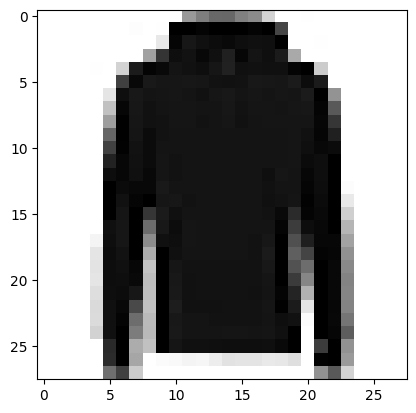

In [7]:
plt.imshow(x_train[100],cmap='binary')

* Model

In [8]:
model = tf.keras.Sequential([

    #some layers
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
weights,biases = model.layers[1].get_weights()

In [14]:
weights.shape , biases.shape

((784, 128), (128,))

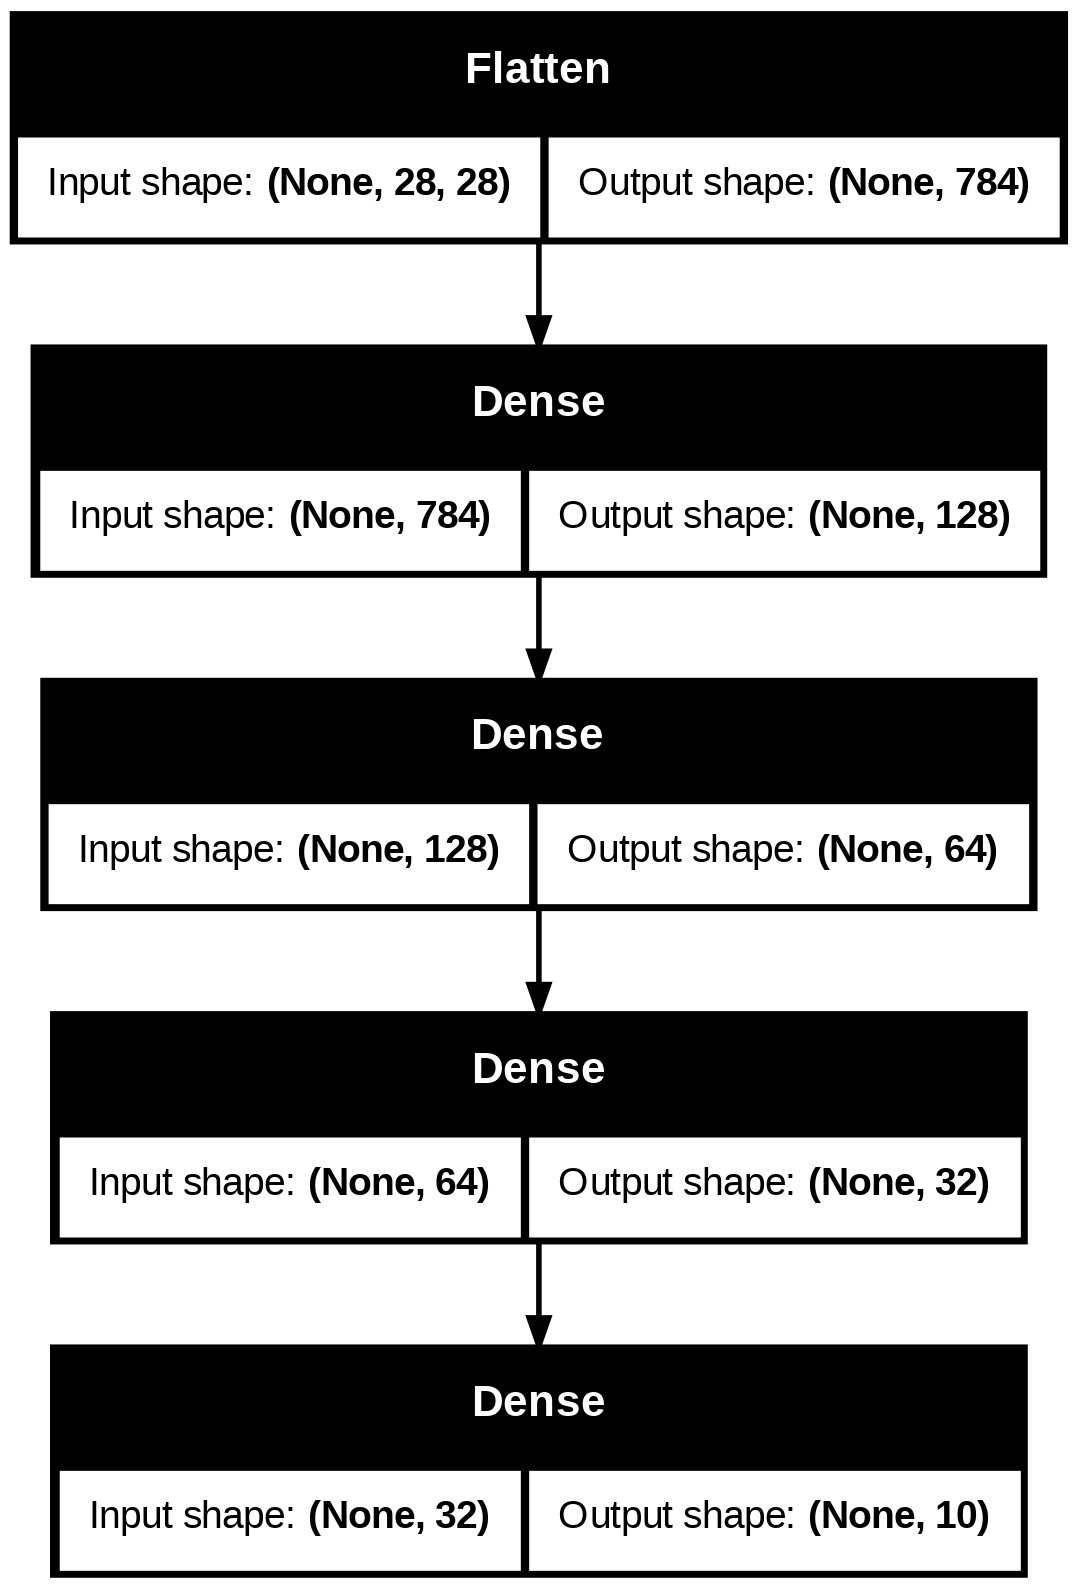

In [15]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [17]:
tf.keras.optimizers.RMSprop()

In [18]:
# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,
                                                  restore_best_weights=True)
#fit
history = model.fit(x_train,y_train,
          validation_data=(x_valid,y_valid),
          batch_size=32,
          epochs=10,
          callbacks=[early_stopping])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6112 - loss: 1.1598 - val_accuracy: 0.7898 - val_loss: 0.5720
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8147 - loss: 0.5267 - val_accuracy: 0.8142 - val_loss: 0.4994
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8376 - loss: 0.4605 - val_accuracy: 0.8325 - val_loss: 0.4575
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8508 - loss: 0.4256 - val_accuracy: 0.8418 - val_loss: 0.4335
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8585 - loss: 0.4017 - val_accuracy: 0.8508 - val_loss: 0.4151
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8652 - loss: 0.3834 - val_accuracy: 0.8562 - val_loss: 0.4021
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8699 - loss: 0.3683 - val_accuracy: 0.8580 - val_loss: 0.3938
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8744 - loss: 0.3557 - 

In [19]:
history.history

{'accuracy': [0.7210555672645569,
  0.8203518390655518,
  0.839722216129303,
  0.8503888845443726,
  0.8583889007568359,
  0.8640740513801575,
  0.8692036867141724,
  0.873203694820404,
  0.876537024974823,
  0.8797407150268555],
 'loss': [0.8168226480484009,
  0.5078645944595337,
  0.45399343967437744,
  0.4228768050670624,
  0.40067657828330994,
  0.38342946767807007,
  0.36917197704315186,
  0.3568900525569916,
  0.34576302766799927,
  0.33591926097869873],
 'val_accuracy': [0.7898333072662354,
  0.8141666650772095,
  0.8324999809265137,
  0.8418333530426025,
  0.8508333563804626,
  0.856166660785675,
  0.8579999804496765,
  0.8613333106040955,
  0.8643333315849304,
  0.8628333210945129],
 'val_loss': [0.5720018148422241,
  0.49942129850387573,
  0.45747384428977966,
  0.4335232079029083,
  0.4151061475276947,
  0.40205758810043335,
  0.39376571774482727,
  0.3842000663280487,
  0.3756919801235199,
  0.37260496616363525]}

Text(0.5, 0, 'Epochs')

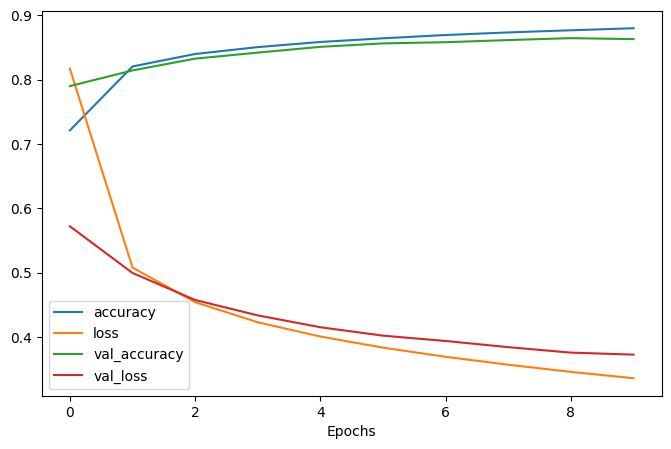

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel('Epochs')

In [25]:
loss,acc = model.evaluate(x_valid,y_valid)
loss,acc

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8681 - loss: 0.3594


(0.37260496616363525, 0.8628333210945129)

In [52]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

`Evaluate`

In [31]:
x_new = x_test[:3]
y_pred_new = np.argmax(model.predict(x_new),axis=-1)
y_pred_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([9, 2, 1])

In [32]:
model.save('ANN_model.h5')

### inference

In [34]:
#reload pretrained model

model = tf.keras.models.load_model('ANN_model.h5')

In [42]:
# read image
from skimage.transform import resize
from skimage.color import rgb2gray

In [56]:
def predict_name(image_path: str):
  img = plt.imread('/content/R.jpeg')

  img_gray = rgb2gray(img)

  img_resized = resize(img_gray,(28,28),anti_aliasing=True)


  ##plt.imshow(img_resized,cmap='gray')


  ## expand dimensions
  img_resized = np.expand_dims(img_resized,axis=0)

  pred = np.argmax(model.predict(img_resized),axis=-1)
  return pred

In [59]:
class_names[predict_name('/content/R.jpeg')[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'Bag'